In [1]:
import numpy as np
import pandas as pd

#OMG no warnings. yea
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()



In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [61]:
df = pd.read_csv("Datasets/churn_in_telecoms.csv")
df_vg = pd.read_csv("Datasets/Video_Games_Sales_as_at_22_Dec_2016.csv")

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89dad9bcc0>,
      dtype=object)

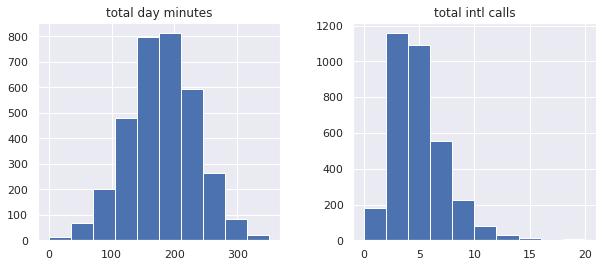

In [6]:
features = ['total day minutes','total intl calls']
df[features].hist(figsize=(10, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89daa1b668>,
      dtype=object)

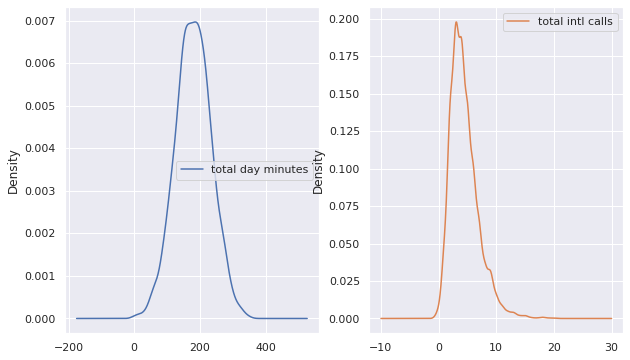

In [7]:
df[features].plot(kind='density', subplots=True, layout=(1,2),sharex=False,figsize = (10,6))

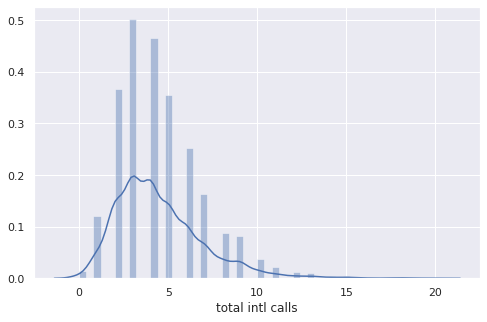

In [8]:
sns.distplot(df['total intl calls'])

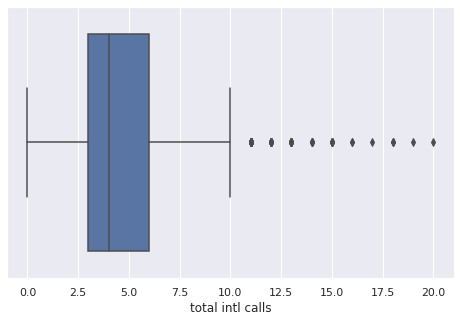

In [9]:
sns.boxplot(x = 'total intl calls', data = df)

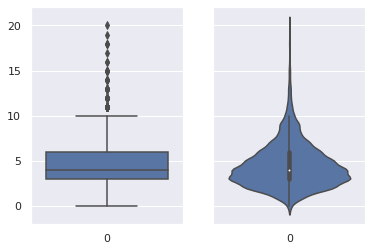

In [10]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['total intl calls'], ax=axes[0]);
sns.violinplot(data=df['total intl calls'], ax=axes[1]);

In [11]:
df[features].describe()

,total day minutes,total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


In [12]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

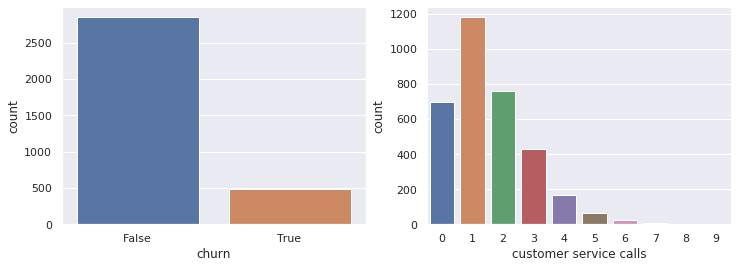

In [13]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='churn', data=df, ax=axes[0]);
sns.countplot(x='customer service calls', data=df, ax=axes[1]);

In [14]:
num_values = list(set(df.columns) - set(list(df.describe(include=['object','bool']).columns)) - set(['area code','customer service calls']))

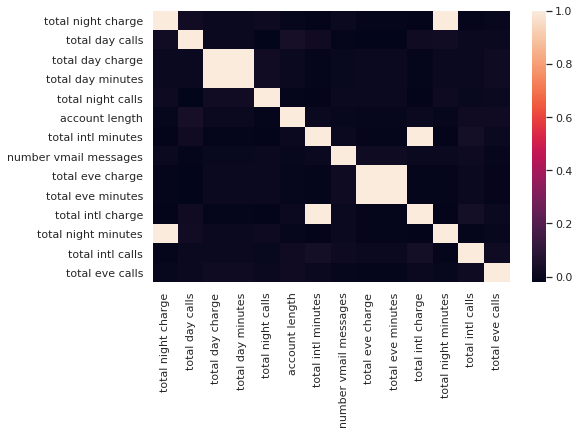

In [15]:
corr_mat = df[num_values].corr()
sns.heatmap(corr_mat)

In [16]:
num_values = list(set(num_values) - 
                 set(['total day charge', 'total eve charge', 'total night charge', 'total intl charge']))

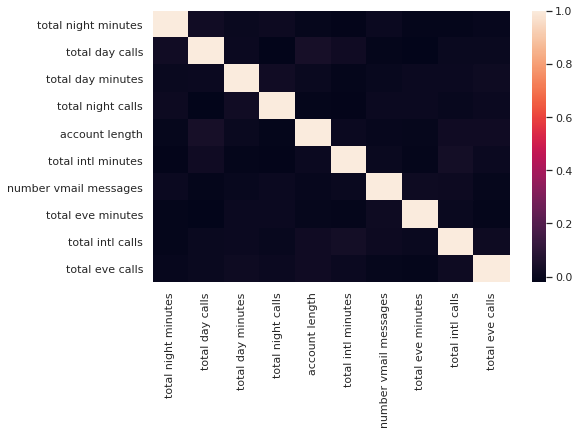

In [17]:
corr_mat = df[num_values].corr()
sns.heatmap(corr_mat)

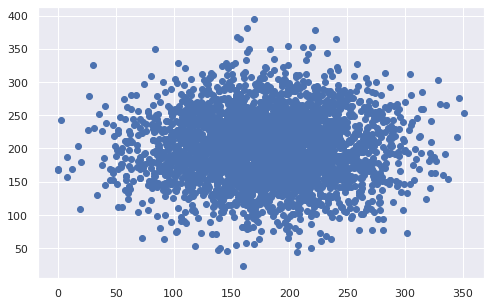

In [18]:
plt.scatter(df['total day minutes'], df['total night minutes'])

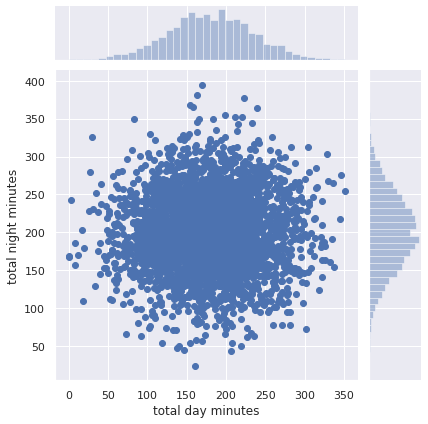

In [19]:
sns.jointplot(x='total day minutes', y='total night minutes', data=df,kind='scatter')

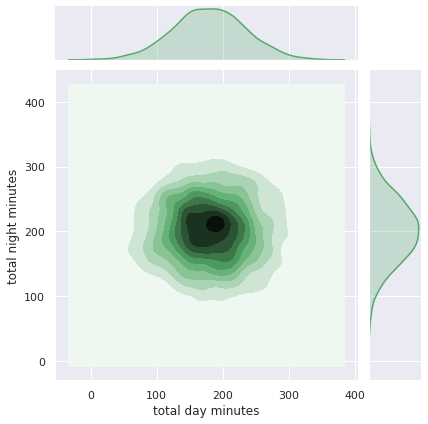

In [20]:
sns.jointplot('total day minutes', 'total night minutes', data=df,
              kind="kde", color="g");

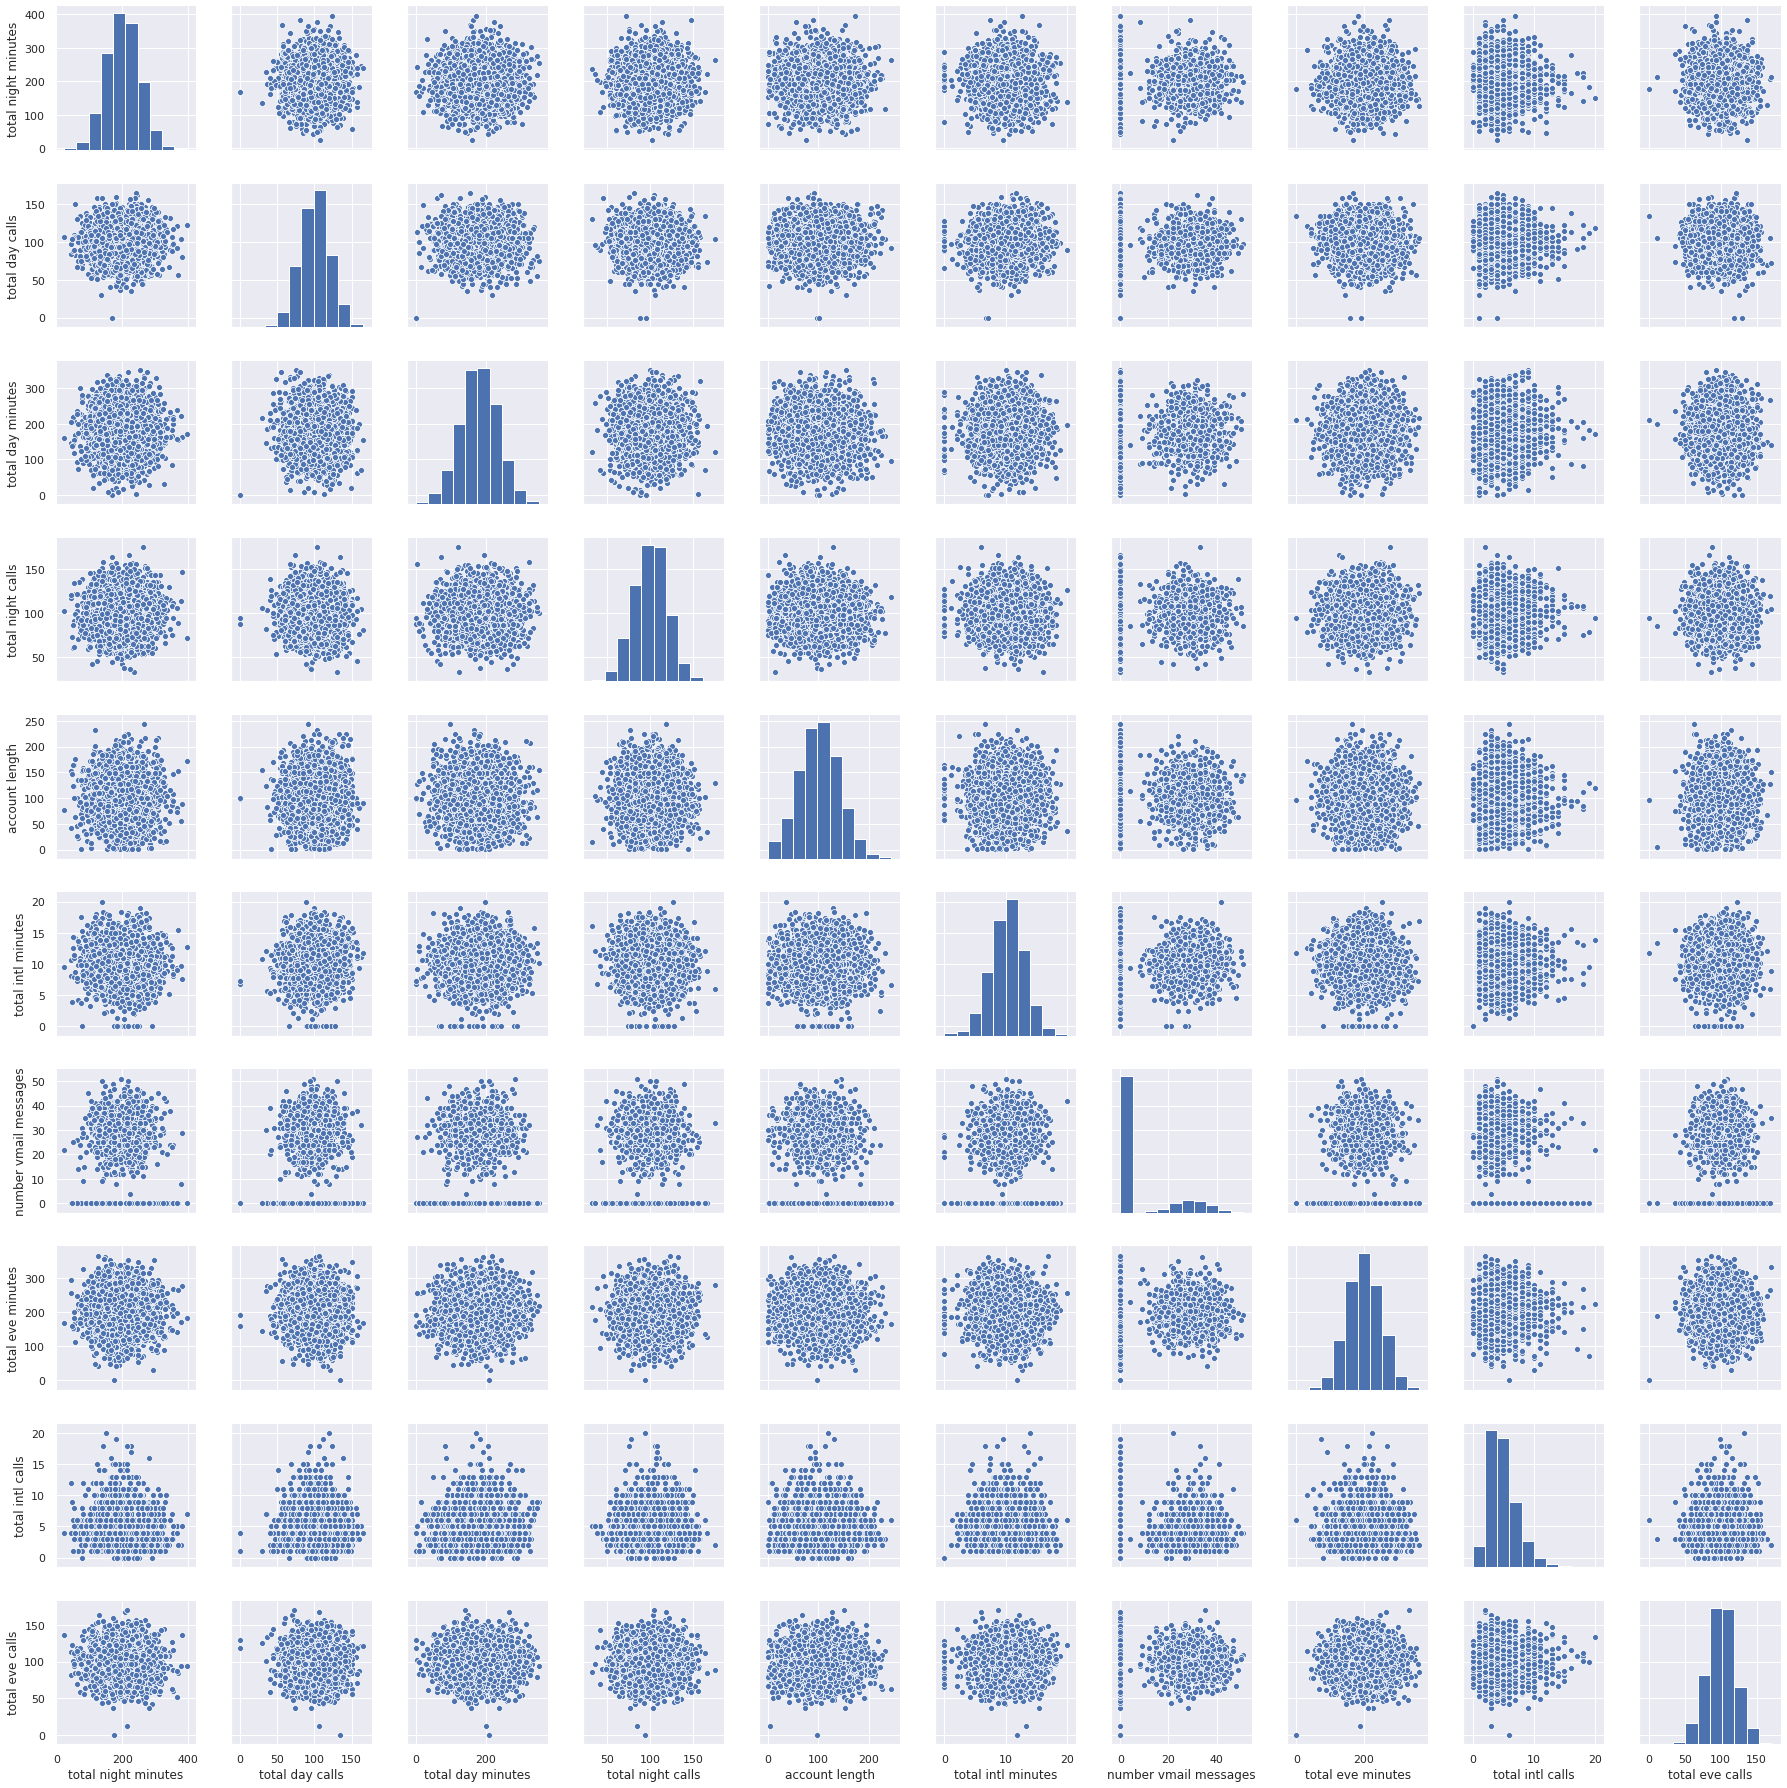

In [21]:
sns.pairplot(df[num_values])

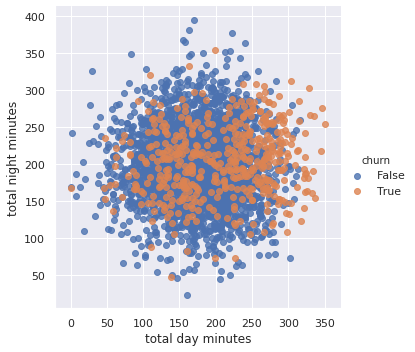

In [22]:
sns.lmplot('total day minutes', 'total night minutes', data=df, hue='churn', fit_reg=False)

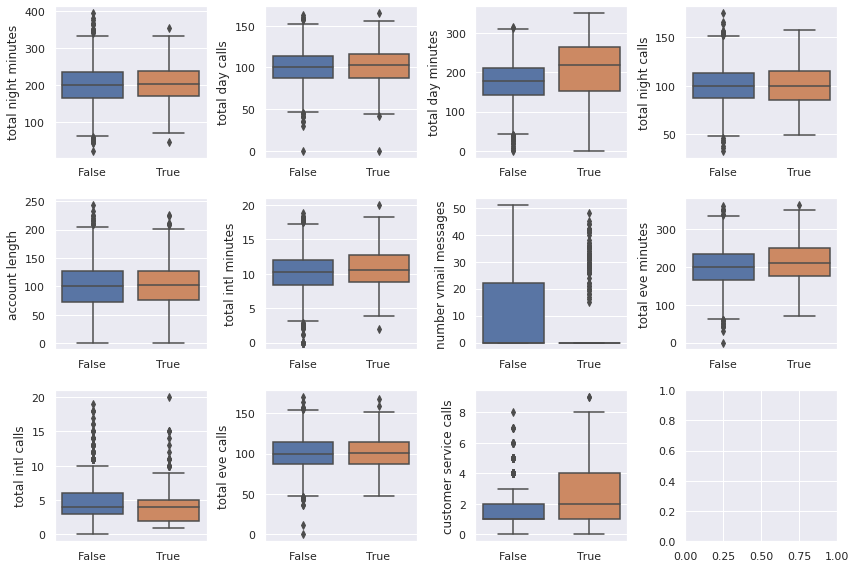

In [23]:
num_values.append('customer service calls')

fig,axes = plt.subplots(nrows=3,ncols=4,figsize = (12,8))
for idx,feat in enumerate(num_values):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout()

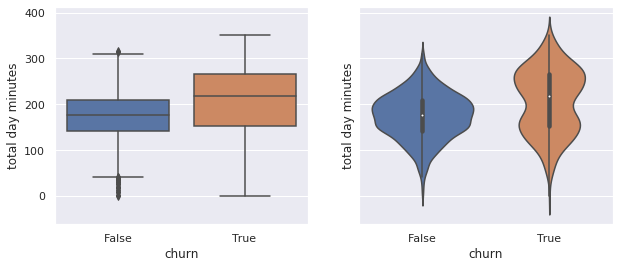

In [24]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='churn', y='total day minutes', data=df, ax=axes[0])
sns.violinplot(x='churn', y='total day minutes', data=df, ax=axes[1])

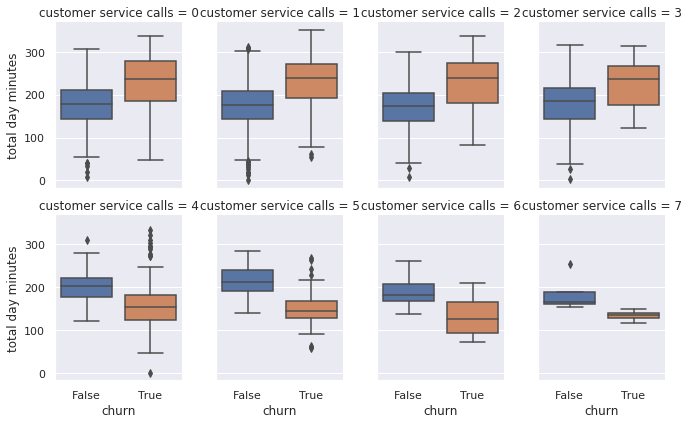

In [25]:
sns.catplot(x='churn', y='total day minutes', col='customer service calls',
               data=df[df['customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

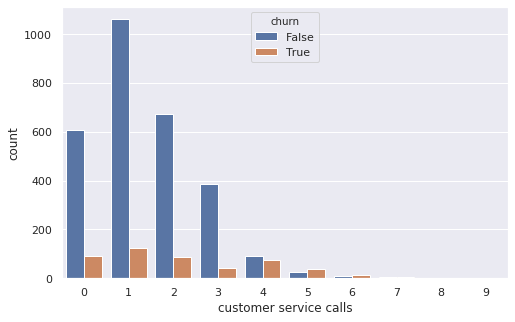

In [26]:
sns.countplot(x = 'customer service calls', hue = 'churn', data = df)

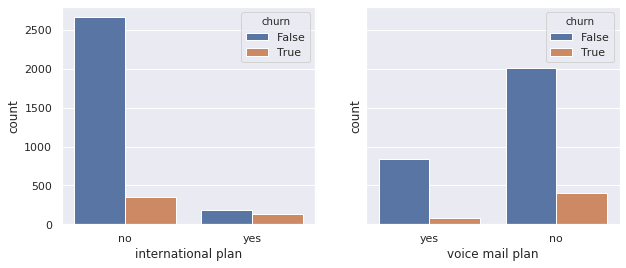

In [27]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0]);
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1]);

In [28]:
pd.crosstab(df['churn'],df['state'])

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [29]:
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


In [30]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [31]:
X = df.drop(['state','churn','phone number'],axis=1)

X['international plan'] = X['international plan'].map({'yes': 1, 'no': 0})
X['voice mail plan'] = X['voice mail plan'].map({'yes': 1, 'no': 0})

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

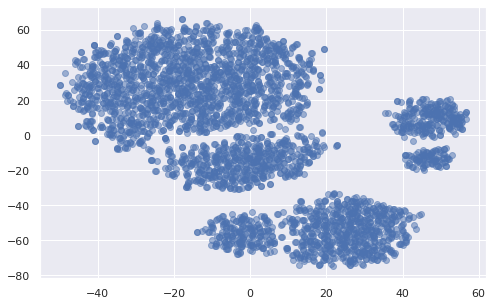

In [34]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

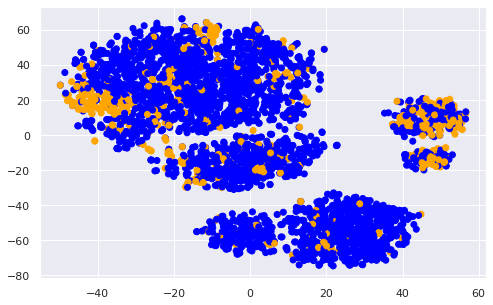

In [35]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
            c=df['churn'].map({False: 'blue', True: 'orange'}));

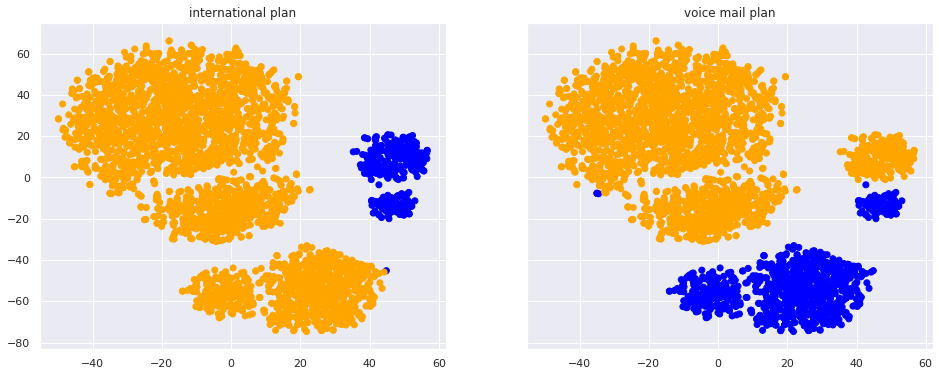

In [36]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

axes[0].scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
            c=df['international plan'].map({'yes': 'blue', 'no': 'orange'}));
axes[1].scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
            c=df['voice mail plan'].map({'yes': 'blue', 'no': 'orange'}));
axes[0].set_title('international plan');
axes[1].set_title('voice mail plan');

# Videogame analysis

In [79]:
df = pd.read_csv('Datasets/Video_Games_Sales_as_at_22_Dec_2016.csv').dropna()
print(df.shape)

(6825, 16)


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null int64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null int64
User_Score         6825 non-null float64
User_Count         6825 non-null int64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(7), int64(3), object(6)
memory usage: 906.4+ KB


In [83]:


df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [85]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


In [91]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 7


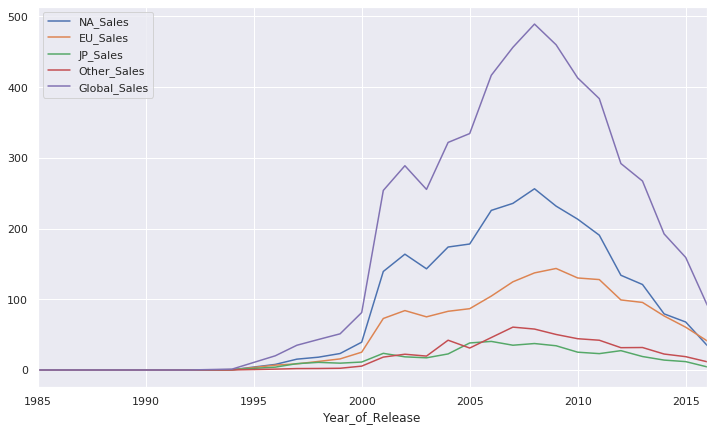

In [92]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot()

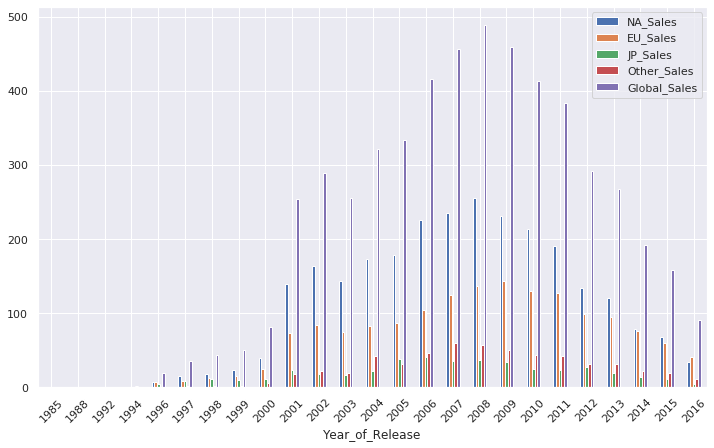

In [93]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

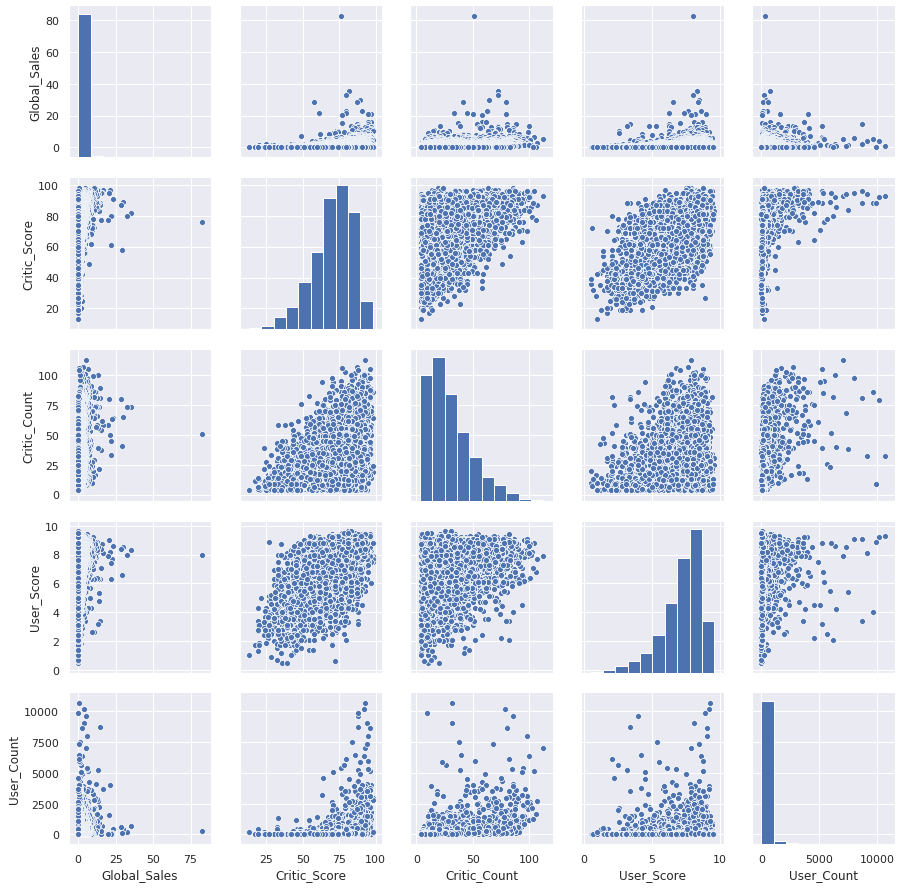

In [94]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

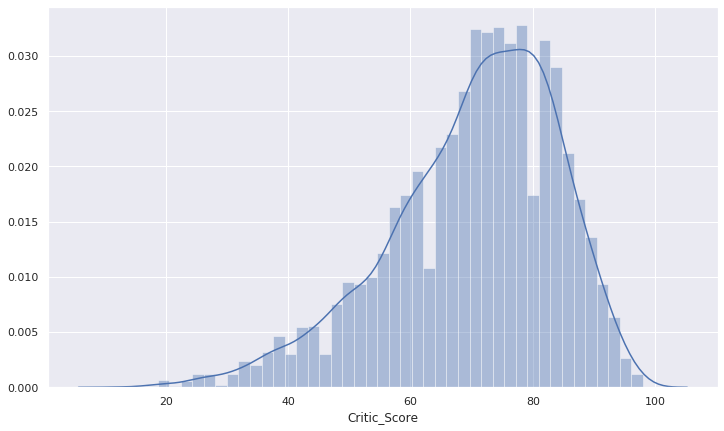

In [95]:
sns.distplot(df.Critic_Score)

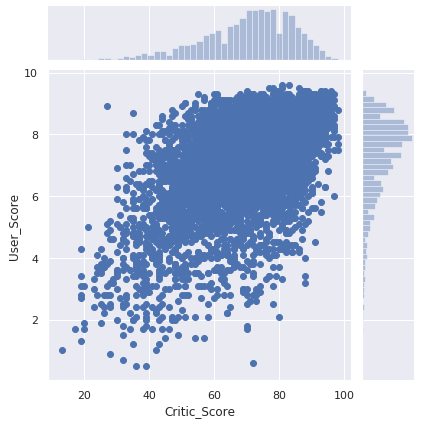

In [96]:
sns.jointplot(x='Critic_Score', y='User_Score', data=df,kind='scatter')

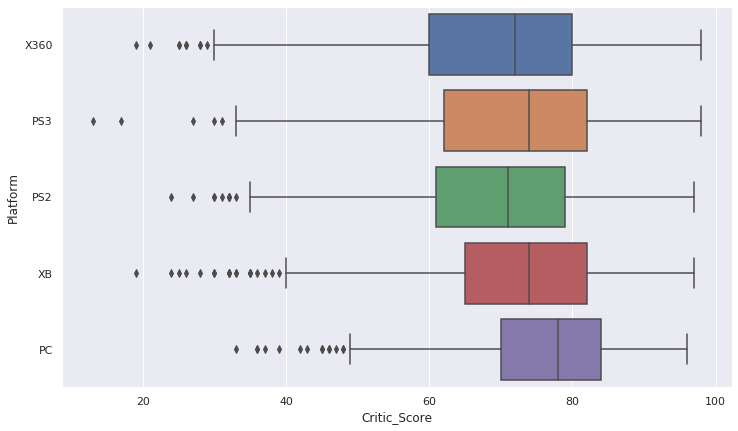

In [97]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", 
            data=df[df['Platform'].isin(top_platforms)], orient="h");

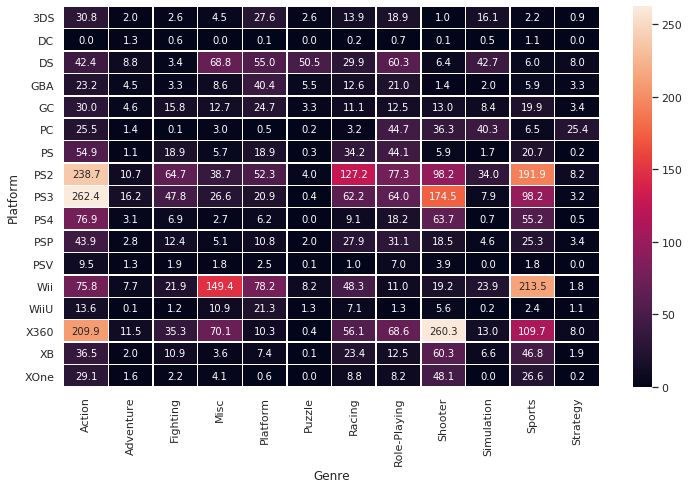

In [98]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);

In [101]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [102]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count())
years_df.columns = ['Global_Sales', 'Number_of_Games']


In [103]:
# Create a line (trace) for the global sales
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df['Global_Sales'],
    name='Global Sales'
)

# Create a line (trace) for the number of games released
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df['Number_of_Games'],
    name='Number of games released'
)

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {'title': 'Statistics for video games'}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [104]:
# Do calculations and prepare the dataset
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

In [105]:
# Create a bar for the global sales
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Global_Sales'],
    name='Global Sales'
)

# Create a bar for the number of games released
trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Number_of_Games'],
    name='Number of games released'
)

# Get together the data and style objects
data = [trace0, trace1]
layout = {'title': 'Market share by gaming platform'}

# Create a `Figure` and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [106]:
data = []

# Create a box trace for each genre in our dataset
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre == genre].Critic_Score, name=genre)
    )
    
# Visualize
iplot(data, show_link=False)

In [4]:
from sklearn.model_selection import StratifiedKFold

a = [1,2,3,4,5,6,7,8,9,0]
y = [0,1,0,1,0,1,0,1,0,1]
skf = StratifiedKFold(n_splits=2,shuffle=False)
s = skf.split(a,y)

In [5]:
s

<generator object _BaseKFold.split at 0x7f2ff8741eb8>